<a href="https://colab.research.google.com/github/asrianda/pemograman/blob/main/SVM_Kernel_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_excel('bener_keluarga.xlsx')
df.head()

,No,Nama Keluarga,Kebutuhan Pangan,Kebutuhan Sandang,Kebutuhan Papan,Kebutuhan Kesehatan,Kebutuhan Pendidikan,Akses Air Bersih,Tenpat tinggal layak huni,Anak Usia 7 - 15 bersekolah,Anggota Keluarga Bekerja,Mempunyai Tabugan,Akses teknologi informasi,Anggota Keluarga Aktif Sosial,Tingkat Kesejahteraan
0,1,DARMAWAN,1,1,1,1,1,1,1,1,1,1,1,1,5
1,2,WASONO,1,1,1,1,1,1,1,1,1,1,1,1,5
2,3,TASIRIN,1,1,1,1,1,1,1,1,1,1,1,1,5
3,4,MAHPUDIN,1,1,1,1,1,1,1,1,1,1,1,1,5
4,5,ASRI MELALA,1,1,1,1,1,1,1,1,1,1,1,0,4


In [5]:
df.columns=df.columns.str.replace(' ', '_')
df.head()

,No,Nama_Keluarga,Kebutuhan_Pangan,Kebutuhan_Sandang,Kebutuhan_Papan,Kebutuhan_Kesehatan,Kebutuhan_Pendidikan,Akses_Air_Bersih,Tenpat_tinggal_layak_huni,Anak_Usia_7_-_15_bersekolah,Anggota_Keluarga_Bekerja,Mempunyai_Tabugan_,Akses_teknologi_informasi_,Anggota_Keluarga_Aktif_Sosial,Tingkat_Kesejahteraan
0,1,DARMAWAN,1,1,1,1,1,1,1,1,1,1,1,1,5
1,2,WASONO,1,1,1,1,1,1,1,1,1,1,1,1,5
2,3,TASIRIN,1,1,1,1,1,1,1,1,1,1,1,1,5
3,4,MAHPUDIN,1,1,1,1,1,1,1,1,1,1,1,1,5
4,5,ASRI MELALA,1,1,1,1,1,1,1,1,1,1,1,0,4


In [9]:
df['Tingkat_Kesejahteraan'].value_counts()

,count
Tingkat_Kesejahteraan,
5,514
4,214
3,180
2,133
1,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   No                             1141 non-null   int64 
 1   Nama_Keluarga                  1141 non-null   object
 2   Kebutuhan_Pangan               1141 non-null   int64 
 3   Kebutuhan_Sandang              1141 non-null   int64 
 4   Kebutuhan_Papan                1141 non-null   int64 
 5   Kebutuhan_Kesehatan            1141 non-null   int64 
 6   Kebutuhan_Pendidikan           1141 non-null   int64 
 7   Akses_Air_Bersih               1141 non-null   int64 
 8   Tenpat_tinggal_layak_huni      1141 non-null   int64 
 9   Anak_Usia_7_-_15_bersekolah    1141 non-null   int64 
 10  Anggota_Keluarga_Bekerja       1141 non-null   int64 
 11  Mempunyai_Tabugan_             1141 non-null   int64 
 12  Akses_teknologi_informasi_     1141 non-null   int64 
 13  Ang

In [19]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [22]:
X=df.drop(['No','Nama_Keluarga','Tingkat_Kesejahteraan'],axis=1)
y=df['Tingkat_Kesejahteraan']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42

In [28]:
X.head()

,Kebutuhan_Pangan,Kebutuhan_Sandang,Kebutuhan_Papan,Kebutuhan_Kesehatan,Kebutuhan_Pendidikan,Akses_Air_Bersih,Tenpat_tinggal_layak_huni,Anak_Usia_7_-_15_bersekolah,Anggota_Keluarga_Bekerja,Mempunyai_Tabugan_,Akses_teknologi_informasi_,Anggota_Keluarga_Aktif_Sosial
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,0


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1).fit(X_train, y_train)

In [31]:
#-- Menghitung Efesiensi Model --
pred_rbf = rbf.predict(X_test)
acc_rbf = accuracy_score(pred_rbf, y_test)
print(acc_rbf)

0.9912663755458515


In [32]:
print(classification_report(y_test, pred_rbf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       0.96      0.96      0.96        26
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        35
           5       1.00      0.99      1.00       114

    accuracy                           0.99       229
   macro avg       0.99      0.99      0.99       229
weighted avg       0.99      0.99      0.99       229



In [33]:
rbf_accuracy = accuracy_score(y_test, pred_rbf)
rbf_f1 = f1_score(y_test, pred_rbf, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  99.13
F1 (RBF Kernel):  99.13


**Grafik tingkat Kesejahteraan**

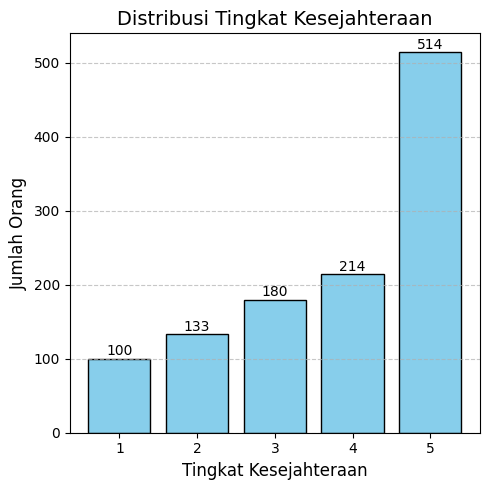

In [38]:
import matplotlib.pyplot as plt

# Data Tingkat Kesejahteraan
tingkat_kesejahteraan = [5, 4, 3, 2, 1]
jumlah_orang = [514, 214, 180, 133, 100]

# Membuat grafik batang
plt.figure(figsize=(5, 5))
plt.bar(tingkat_kesejahteraan, jumlah_orang, color='skyblue', edgecolor='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Tingkat Kesejahteraan', fontsize=14)
plt.xlabel('Tingkat Kesejahteraan', fontsize=12)
plt.ylabel('Jumlah Orang', fontsize=12)

# Menambahkan nilai pada puncak batang
for i, jumlah in enumerate(jumlah_orang):
    plt.text(tingkat_kesejahteraan[i], jumlah + 5, str(jumlah), ha='center', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
!pip install flask-ngrok

In [47]:
from flask import Flask, send_file
from flask_ngrok import run_with_ngrok
import matplotlib.pyplot as plt
import io

# Inisialisasi Flask
app = Flask(__name__)
run_with_ngrok(app)  # Menjalankan Flask dengan ngrok

# Fungsi untuk membuat grafik
def buat_grafik():
    # Data Tingkat Kesejahteraan
    tingkat_kesejahteraan = [5, 4, 3, 2, 1]
    jumlah_orang = [514, 214, 180, 133, 100]

    # Membuat grafik batang
    plt.figure(figsize=(8, 5))
    plt.bar(tingkat_kesejahteraan, jumlah_orang, color='skyblue', edgecolor='black')

    # Menambahkan judul dan label sumbu
    plt.title('Distribusi Tingkat Kesejahteraan', fontsize=14)
    plt.xlabel('Tingkat Kesejahteraan', fontsize=12)
    plt.ylabel('Jumlah Orang', fontsize=12)

    # Menambahkan nilai pada puncak batang
    for i, jumlah in enumerate(jumlah_orang):
        plt.text(tingkat_kesejahteraan[i], jumlah + 5, str(jumlah), ha='center', fontsize=10)

    # Menyimpan grafik ke buffer
    img = io.BytesIO()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig(img, format='png')
    img.seek(0)
    plt.close()
    return img

@app.route('/')
def index():
    return '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Grafik Kesejahteraan</title>
    </head>
    <body>
        <h1>Distribusi Tingkat Kesejahteraan</h1>
        <img src="/grafik" alt="Grafik Tingkat Kesejahteraan">
    </body>
    </html>
    '''

@app.route('/grafik')
def grafik():
    img = buat_grafik()
    return send_file(img, mimetype='image/png')

# Menjalankan Flask
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll